 모델 평가와 성능 향상
 ===

#### 우리는 더 좋은 모델을 만들기 위해서 모델 평가나 매개변수 선택에 대해 고민해봐야 함



- train_test_split : 데이터셋을 훈련 세트와 테스트 셋으로 나뉨
- score : 모델을 평가하기 위해 테스트 세트에 적용하여 정확히 분류된 샘플 비율을 계산

## 5.1 교차 검증

---

#### cross-validation은 일반화 성능을 재기 위해 훈련 세트와 테스트 세트로 한번 나누는것보다 훨씬 더 안정적임

- 데이터 셋을 여러번 반복해서 나누고 여러 모델을 학습
- 보통 k-겹 교차검증(k-fold CV)을 사용함.(fold: 비슷한 크기의 부분 집합을 의미)
  - 부분 집합 k개로 나눈 뒤에
  - 일련의 모델들을 만듬. 가령 5개라고 하면 첫 번째 폴드를 테스트 셋으로 하용하고 나머지(2-5)를 훈련 세트로 사용하여 폴드 1을 사용해 정확도를 평가
  - 이후에는 두 번쨰 폴드를 테스트 셋으로 허용하고 1,3,4,5를 사용
  - 등등등... 다섯개의 정확도 값을 얻을 수 있음

In [1]:
import mglearn
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

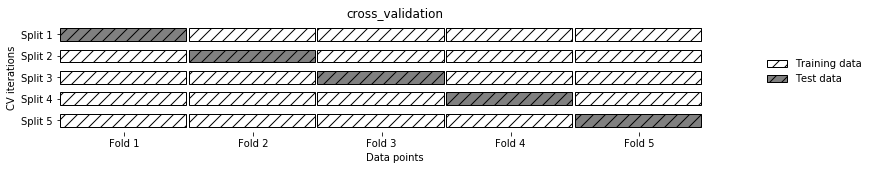

In [2]:
mglearn.plots.plot_cross_validation()

In [3]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

iris = load_iris()
logreg = LogisticRegression()

scores = cross_val_score(logreg, iris.data, iris.target)
print("3겹 교차 검증 점수: {}".format(scores))

scores_cv = cross_val_score(logreg, iris.data, iris.target, cv=5)
print("5겹 교차 검증 점수: {}".format(scores_cv))
print("5겹 교차 검증 점수: {:.2f}".format(scores_cv.mean()))

3겹 교차 검증 점수: [ 0.96078431  0.92156863  0.95833333]
5겹 교차 검증 점수: [ 1.          0.96666667  0.93333333  0.9         1.        ]
5겹 교차 검증 점수: 0.96


### 5.1.2 교차 검증의 장점

1. train_test_split은 데이터를 무작위로 나누기 때문에 좋은 샘플만 나눠질 수도 있어 정확도가 제대로 나오지 않을 수도 있음. 그에 반해 교차검증은 테스트 세트에 정확도가 한번씩 나오기 때문에 일반화가 가능-모델을 나누면 모델이 훈련 데이터에 민감한지 알 수 있음
2. 분할을 한 번 했을 때 보다 데이터를 더 효과적으로 사용할 수 있음.

단점은 연산 비용이 좀더 늘어남. k배 더 느림

### 5.1.3 계층별 k-겹 교차 검증과 그외 전략들

In [4]:
from sklearn.datasets import load_iris
iris= load_iris()
print("Iris label:\n{}".format(iris.target))

Iris label:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


그냥 검증하면 문제가 생기기 때문에 **계층별 k-겹 교차검증***stratified k-fold cross validation*을 사용함

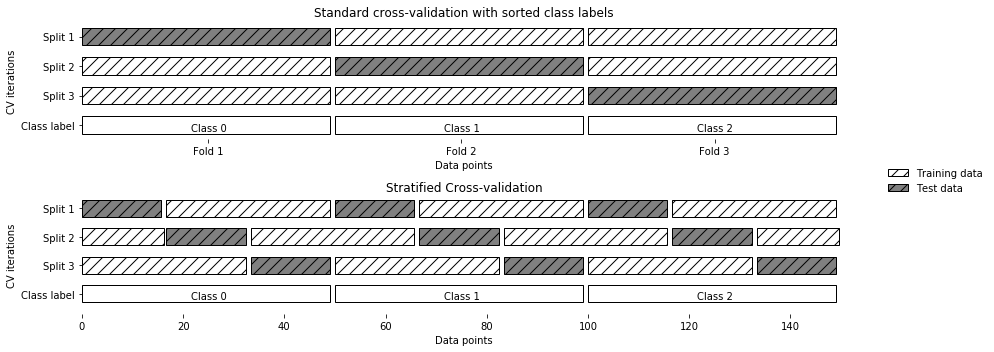

In [5]:
mglearn.plots.plot_stratified_cross_validation()

#### 교차 검증 상세 옵션

In [6]:
### 교차 검증 분할기를 만들어 놨음. :)

from sklearn.model_selection import KFold
kfold = KFold(n_splits=5)

print("교차 검증 점수:\n{}".format(cross_val_score(logreg, iris.data, iris.target, cv=kfold)))

교차 검증 점수:
[ 1.          0.93333333  0.43333333  0.96666667  0.43333333]


In [7]:
kfold = KFold(n_splits=3)

print("교차 검증 점수:\n{}".format(cross_val_score(logreg, iris.data, iris.target, cv=kfold)))

교차 검증 점수:
[ 0.  0.  0.]


In [8]:
kfold = KFold(n_splits=3, shuffle = True, random_state=0)

print("교차 검증 점수:\n{}".format(cross_val_score(logreg, iris.data, iris.target, cv=kfold)))

교차 검증 점수:
[ 0.9   0.96  0.96]


#### LOOCV (Leave-one-out cross validation)

폴드 하나에 샘플 하나만 들어있는 k겹 교차검증으로 생각할 수 있음.

각 반복에서 하나의 데이터 포인트를 선택해 테스트 세트로 사용한다. 작은 데이터셋에서 효과가 좀 좋다.

(k-fold Cross Validation을 극단으로 가져가면 k를 데이터 관측치 수 n 만큼 하는 경우

출처: http://rfriend.tistory.com/tag/LOOCV [R, Python 분석과 프로그래밍 (by R Friend)])

In [9]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()

scores = cross_val_score(logreg, iris.data, iris.target, cv=loo)
print("교차 검증 분할 횟수:", len(scores))
print("평균 정확도: {:.2f}".format(scores.mean()))

교차 검증 분할 횟수: 150
평균 정확도: 0.95


#### 임의 분할 교차 검증

train size만큼의 포인트로 훈련 세트를 만들고, test size만큼의 포인트로 테스트 세트를 만들도록 분할한다.

이 분할은 n_splits횟수만큼 반복시킨다. 

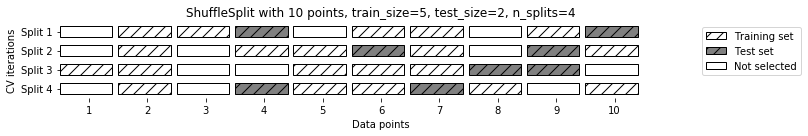

In [10]:
mglearn.plots.plot_shuffle_split()

In [11]:
from sklearn.model_selection import ShuffleSplit
shuffle_split = ShuffleSplit(test_size=.5, train_size=.5, n_splits=10)
scores = cross_val_score(logreg, iris.data, iris.target, cv=shuffle_split)
print("교차 검증 점수: \n{}".format(scores))

교차 검증 점수: 
[ 0.93333333  0.93333333  0.96        0.92        0.93333333  0.93333333
  0.90666667  0.88        0.97333333  0.97333333]


#### 그룹별 교차 검증

데이터 안에 연관된 그룹이 있을 때도 교차검증을 사용한다. 얼굴 사진에서의 표정 인식기를 맏는다고 했을때 이 데이터셋에 없는 사람의 표정을 정확히 구분하는 것이 목표. 최대한 정확한 측정을 위해서는 훈련 세트와 테스트 세트에 서로 다른 사람의 얼굴이 들어가도록 해야합니다.

- GroupKFold 사용

In [12]:
from sklearn.model_selection import GroupKFold
from mglearn.datasets import make_blobs 

# 인위적 데이터셋 생성
X, y = make_blobs(n_samples=12, random_state=0)

# 처음 세 개의 샘플은 같은 그룹에 속하고
# 다음은 네 개의 샘플이 같습니다.
groups = [0, 0, 0, 1, 1, 1, 1, 2, 2, 3, 3, 3]
scores = cross_val_score(logreg, X, y, groups, cv=GroupKFold(n_splits=3))
print("교차 검증 점수:\n{}".format(scores))

교차 검증 점수:
[ 1.   0.8  1. ]


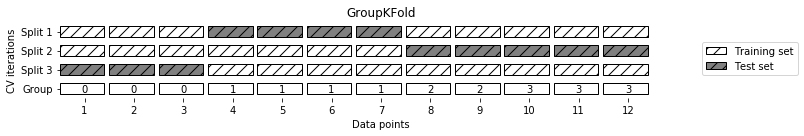

In [13]:
mglearn.plots.plot_group_kfold()

### 5.2 그리드 서치

매개변수를 튜닝하여 일반화 성능을 개선하자!

예를들어 커널 SVM에서는 커널 폭의 gamma와 매개변수 C를 얼마나 잘 튜닝하는지가 중요하다

#### 5.2.1 간단한 그리드 서치

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
# 간단한 그리드 서치 구현
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target,
                                                    random_state=0)
print("훈련 세트의 크기: {}   테스트 세트의 크기: {}".format(
      X_train.shape[0], X_test.shape[0]))

best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # 매개변수의 각 조합에 대해 SVC를 훈련시킵니다
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        # 테스트 세트로 SVC를 평가합니다
        score = svm.score(X_test, y_test)
        # 점수가 더 높으면 매개변수와 함께 기록합니다
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}
            
print("최고 점수: {:.2f}".format(best_score))
print("최적 파라미터: {}".format(best_parameters))

훈련 세트의 크기: 112   테스트 세트의 크기: 38
최고 점수: 0.97
최적 파라미터: {'gamma': 0.001, 'C': 100}


#### 5.2.2 매개변수 과대적합과 검증 세트

97%는 일단 최적으로 보이지만 새로운 데이터에서도 역시 똑같은 정확도를 보일까?

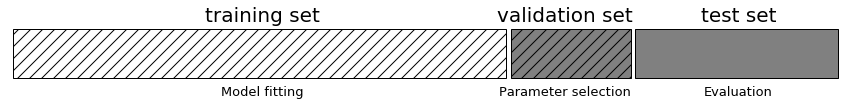

In [16]:
mglearn.plots.plot_threefold_split()

In [17]:
from sklearn.svm import SVC

# 데이터를 훈련+검증 세트 그리고 테스트 세트로 분할
X_trainval, X_test, y_trainval, y_test = train_test_split(
    iris.data, iris.target, random_state=0)

# 훈련+검증 세트를 훈련 세트와 검증 세트로 분할
X_train, X_valid, y_train, y_valid = train_test_split(
    X_trainval, y_trainval, random_state=1)

print("훈련 세트의 크기: {}   검증 세트의 크기: {}   테스트 세트의 크기:"
      " {}\n".format(X_train.shape[0], X_valid.shape[0], X_test.shape[0]))

best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # 매개변수의 각 조합에 대해 SVC를 훈련시킵니다
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        # 검증 세트로 SVC를 평가합니다
        score = svm.score(X_valid, y_valid)
        # 점수가 더 높으면 매개변수와 함께 기록합니다
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}

# 훈련 세트와 검증 세트를 합쳐 모델을 다시 만든 후
# 테스트 세트를 사용해 평가합니다
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)
test_score = svm.score(X_test, y_test)
print("검증 세트에서 최고 점수: {:.2f}".format(best_score))
print("최적 파라미터: ", best_parameters)
print("최적 파라미터에서 테스트 세트 점수: {:.2f}".format(test_score))

훈련 세트의 크기: 84   검증 세트의 크기: 28   테스트 세트의 크기: 38

검증 세트에서 최고 점수: 0.96
최적 파라미터:  {'gamma': 0.001, 'C': 10}
최적 파라미터에서 테스트 세트 점수: 0.92


새로운 테스트셋에서는 92%에서만 정확하게 분류하게 된다. 최대한 분리해서 사용하는것이 권장되고 테스트 세트를 따로 보관하는 것이 좋다.

#### 5.2.3 교차 검증을 사용한 그리드 서치

In [18]:
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # 매개변수의 각 조합에 대해 SVC를 훈련시킵니다
        svm = SVC(gamma=gamma, C=C)
        # 교차 검증을 적용합니다
        scores = cross_val_score(svm, X_trainval, y_trainval, cv=5)
        # 교차 검증 정확도의 평균을 계산합니다
        score = np.mean(scores)
        # 점수가 더 높으면 매개변수와 함께 기록합니다
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}
# 훈련 세트와 검증 세트를 합쳐 모델을 다시 만듭니다
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

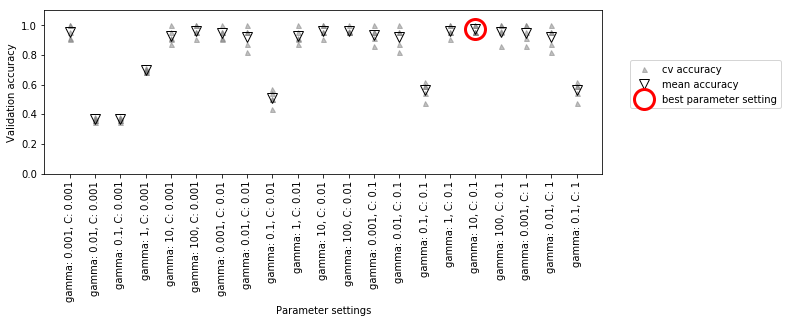

In [19]:
mglearn.plots.plot_cross_val_selection()

#### 교차 검증과 그리드 서치를 활용한 매개변수 선택과 모델 평가의 작업 흐름

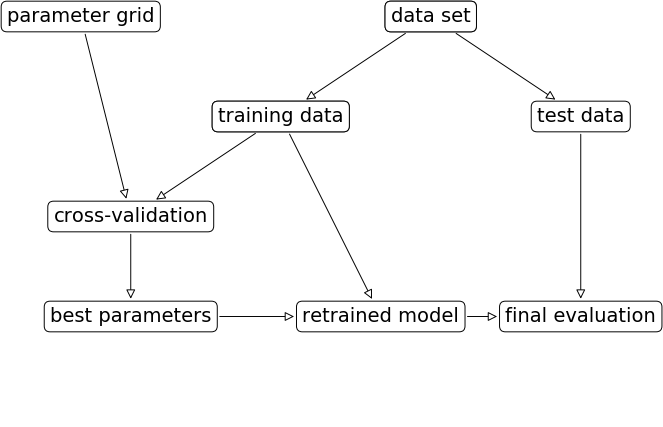

In [20]:
mglearn.plots.plot_grid_search_overview()

In [21]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
print("매개변수 그리드:\n{}".format(param_grid))

매개변수 그리드:
{'gamma': [0.001, 0.01, 0.1, 1, 10, 100], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}


In [22]:
from  sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
grid_search = GridSearchCV(SVC(), param_grid, cv=5, return_train_score=True)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target,
                                                    random_state=0)

grid_search.fit(X_train, y_train)


print("테스트 세트 점수:{}".format(grid_search.score(X_test, y_test)))
print("최적 매개변수: {}".format(grid_search.best_params_))
print("최고 교차 검증 점수: {:.2f}".format(grid_search.best_score_))
print("최고 성능 모델:\n{}".format(grid_search.best_estimator_))

테스트 세트 점수:0.9736842105263158
최적 매개변수: {'gamma': 0.01, 'C': 100}
최고 교차 검증 점수: 0.97
최고 성능 모델:
SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


best_score_ 메소드의 경우 훈련 세트에서 수행한 교차 검증의 평균 정확도가 저장됩니다. score는 모델 일반화 성능과 연관 있습니다.

#### 교차 검증 결과 분석

시각화를 하게 되면 대상 매개변수가 모델의 일반화에 영향을 얼마나 주는지 이해하는데 도움이 됩니다. 

연산이 많이 들기 때문에 간격은 넓게, 적은 수의 그리드로 시작해서 확장해 나가야 합니다.

In [24]:
import pandas as pd
pd.set_option('display.max_columns', None)
# DataFrame으로 변환합니다
results = pd.DataFrame(grid_search.cv_results_)
# 처음 다섯 개 행을 출력합니다
display(np.transpose(results.head()))

,0,1,2,3,4
mean_fit_time,0.000847864,0.00129724,0.00128741,0.00110779,0.00123501
mean_score_time,0.000439167,0.000668573,0.000630426,0.000501394,0.000626326
mean_test_score,0.366071,0.366071,0.366071,0.366071,0.366071
mean_train_score,0.366079,0.366079,0.366079,0.366079,0.366079
param_C,0.001,0.001,0.001,0.001,0.001
param_gamma,0.001,0.01,0.1,1,10
params,"{'gamma': 0.001, 'C': 0.001}","{'gamma': 0.01, 'C': 0.001}","{'gamma': 0.1, 'C': 0.001}","{'gamma': 1, 'C': 0.001}","{'gamma': 10, 'C': 0.001}"
rank_test_score,22,22,22,22,22
split0_test_score,0.375,0.375,0.375,0.375,0.375
split0_train_score,0.363636,0.363636,0.363636,0.363636,0.363636


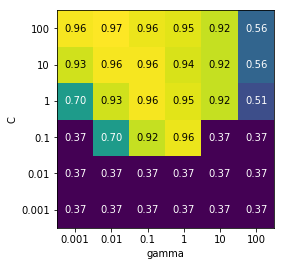

In [25]:
scores = np.array(results.mean_test_score).reshape(6, 6)
mglearn.tools.heatmap(scores, xlabel='gamma', xticklabels=param_grid['gamma'],
                      ylabel='C', yticklabels=param_grid['C'], cmap="viridis")


색깔이 극명한 차이를 보이기 때문에 파라미터를 어떻게 지정하느냐에 따라서 성능이 달라질 것으로 확인이 됩니다.

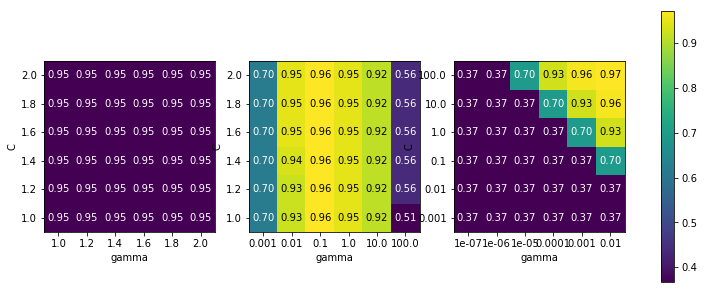

In [26]:
fig, axes = plt.subplots(1, 3, figsize=(13, 5))

param_grid_linear = {'C': np.linspace(1, 2, 6),
                     'gamma':  np.linspace(1, 2, 6)}

param_grid_one_log = {'C': np.linspace(1, 2, 6),
                     'gamma':  np.logspace(-3, 2, 6)}

param_grid_range = {'C': np.logspace(-3, 2, 6),
                     'gamma':  np.logspace(-7, -2, 6)}

for param_grid, ax in zip([param_grid_linear, param_grid_one_log,
                           param_grid_range], axes):
    grid_search = GridSearchCV(SVC(), param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    scores = grid_search.cv_results_['mean_test_score'].reshape(6, 6)

    # 교차 검증 평균 점수의 히트맵 그래프
    scores_image = mglearn.tools.heatmap(
        scores, xlabel='gamma', ylabel='C', xticklabels=param_grid['gamma'],
        yticklabels=param_grid['C'], cmap="viridis", ax=ax)
    
plt.colorbar(scores_image, ax=axes.tolist())

#### 비대칭 매개변수 그리드 탐색

kernel이 linear일경우에는 선형 모형이라 C만 사용하기 때문에 그리드 서치를 할 때 굳이 감마값을 찾지 않아도 된다.

조건부 매개변수 조합을 만들 수 있음. -> 딕셔너리 형태로 삽입

In [28]:
## 매개변수 조합 딕셔너리 형태로 만들기
param_grid = [{'kernel': ['rbf'],
               'C': [0.001, 0.01, 0.1, 1, 10, 100],
               'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
              {'kernel': ['linear'],
               'C': [0.001, 0.01, 0.1, 1, 10, 100]}]
print("그리드 목록:\n{}".format(param_grid))

그리드 목록:
[{'kernel': ['rbf'], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}, {'kernel': ['linear'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}]


In [29]:
grid_search = GridSearchCV(SVC(), param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)
print("최적 파라미터: {}".format(grid_search.best_params_))
print("최고 교차 검증 점수: {:.2f}".format(grid_search.best_score_))

최적 파라미터: {'kernel': 'rbf', 'gamma': 0.01, 'C': 100}
최고 교차 검증 점수: 0.97


In [30]:
results = pd.DataFrame(grid_search.cv_results_)
display(results.T)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41
mean_fit_time,0.00112362,0.000823259,0.000922441,0.000915003,0.000817013,0.000789738,0.000771618,0.000715351,0.000791836,0.000803375,0.000854969,0.00104423,0.00101161,0.00153723,0.00127716,0.00131764,0.00134077,0.00132256,0.00119977,0.0012517,0.000654316,0.00108099,0.00230546,0.00145621,0.000872755,0.000576687,0.000645971,0.000654268,0.000972414,0.000952005,0.000614977,0.000502825,0.00045023,0.000540781,0.000967836,0.000996208,0.000531387,0.000501156,0.000454378,0.000384808,0.000479507,0.000398588
mean_score_time,0.000585365,0.000392962,0.000390959,0.000533581,0.000380611,0.000404263,0.000402546,0.000303602,0.000355577,0.000387621,0.000333214,0.000444937,0.000396013,0.000767946,0.000544643,0.000667381,0.000521278,0.000541496,0.00054841,0.000541306,0.00045228,0.000521421,0.000823927,0.000654745,0.000475025,0.000302029,0.000294781,0.000323582,0.000278997,0.000302219,0.000250196,0.00032196,0.000254631,0.000254345,0.000278997,0.000283957,0.000268793,0.000291395,0.000333405,0.000224352,0.000332117,0.000226021
mean_test_score,0.366071,0.366071,0.366071,0.366071,0.366071,0.366071,0.366071,0.366071,0.366071,0.366071,0.366071,0.366071,0.366071,0.696429,0.919643,0.955357,0.366071,0.366071,0.696429,0.928571,0.964286,0.946429,0.919643,0.508929,0.928571,0.964286,0.964286,0.9375,0.919643,0.5625,0.964286,0.973214,0.955357,0.946429,0.919643,0.5625,0.366071,0.848214,0.946429,0.973214,0.964286,0.964286
mean_train_score,0.366079,0.366079,0.366079,0.366079,0.366079,0.366079,0.366079,0.366079,0.366079,0.366079,0.366079,0.366079,0.366079,0.696424,0.919744,0.959846,0.38171,0.366079,0.696424,0.935325,0.97765,0.984393,1,1,0.935325,0.977676,0.986566,0.986591,1,1,0.977676,0.984368,0.988788,1,1,1,0.366079,0.855069,0.966538,0.984368,0.988813,0.993258
param_C,0.001,0.001,0.001,0.001,0.001,0.001,0.01,0.01,0.01,0.01,0.01,0.01,0.1,0.1,0.1,0.1,0.1,0.1,1,1,1,1,1,1,10,10,10,10,10,10,100,100,100,100,100,100,0.001,0.01,0.1,1,10,100
param_gamma,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,10,100,NaN,NaN,NaN,NaN,NaN,NaN
param_kernel,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,linear,linear,linear,linear,linear,linear
params,"{'kernel': 'rbf', 'gamma': 0.001, 'C': 0.001}","{'kernel': 'rbf', 'gamma': 0.01, 'C': 0.001}","{'kernel': 'rbf', 'gamma': 0.1, 'C': 0.001}","{'kernel': 'rbf', 'gamma': 1, 'C': 0.001}","{'kernel': 'rbf', 'gamma': 10, 'C': 0.001}","{'kernel': 'rbf', 'gamma': 100, 'C': 0.001}","{'kernel': 'rbf', 'gamma': 0.001, 'C': 0.01}","{'kernel': 'rbf', 'gamma': 0.01, 'C': 0.01}","{'kernel': 'rbf', 'gamma': 0.1, 'C': 0.01}","{'kernel': 'rbf', 'gamma': 1, 'C': 0.01}","{'kernel': 'rbf', 'gamma': 10, 'C': 0.01}","{'kernel': 'rbf', 'gamma': 100, 'C': 0.01}","{'kernel': 'rbf', 'gamma': 0.001, 'C': 0.1}","{'kernel': 'rbf', 'gamma': 0.01, 'C': 0.1}","{'kernel': 'rbf', 'gamma': 0.1, 'C': 0.1}","{'kernel': 'rbf', 'gamma': 1, 'C': 0.1}","{'kernel': 'rbf', 'gamma': 10, 'C': 0.1}","{'kernel': 'rbf', 'gamma': 100, 'C': 0.1}","{'kernel': 'rbf', 'gamma': 0.001, 'C': 1}","{'kernel': 'rbf', 'gamma': 0.01, 'C': 1}","{'kernel': 'rbf', 'gamma': 0.1, 'C': 1}","{'kernel': 'rbf', 'gamma': 1, 'C': 1}","{'kernel': 'rbf', 'gamma': 10, 'C': 1}","{'kernel': 'rbf', 'gamma': 100, 'C': 1}","{'kernel': 'rbf', 'gamma': 0.001, 'C': 10}","{'kernel': 'rbf', 'gamma': 0.01, 'C': 10}","{'kernel': 'rbf', 'gamma': 0.1, 'C': 10}","{'kernel': 'rbf', 'gamma': 1, 'C': 10}","{'kernel': 'rbf', 'gamma': 10, 'C': 10}","{'kernel': 'rbf', 'gamma': 100, 'C': 10}","{'kernel': 'rbf', 'gamma': 0.001, 'C': 100}","{'kernel': 'rbf', 'gamma': 0.01, 'C': 100}","{'kernel': 'rbf', 'gamma': 0.1, 'C': 100}","{'kernel': 'rbf', 'gamma': 1, 'C': 100}","{'kernel': 'rbf', 'gamma': 10, 'C': 100}","{'kernel': 'rbf', 'gamma': 1

#### 그리드 서치에 다양한 교차 검증 적용

- 분류 : 계층형 k겹 교차검증 사용
- 회귀 : k겹 교차검증 사용

ShuffleSplit, StratifiedShuffleSplit을 사용해서 한 번 분할할 수 있음

#### 중첩 교차 검증

교차검증 하는 방법
1. 한 번에 훈련, 검증, 테스트 셋으로 나눈다
2. 훈련 세트와 테스트 세트로 나눈 뒤에 훈련 세트로 교차 검증을 수행한다

한번만 나누기 때문에 분할이 어떻게 되는지에 따라 결과값이 크게 달라질 수 있다. **중첩 교차 검증** 사용

뭔가 미래 데이터의 예측모델이기 보다는 최적 매개변수가 모델을 일반화 잘 시켰는지 확인하는게 더 큼

  1. 바깥쪽 루프에서 훈련, 테스트 셋으로 나눈 뒤에 각 훈련 세트마다 그리드서치를 실행하고
  2. 바깥쪽에서 분할된 테스트 세트의 점수를 최적의 매개변수 설정을 사용해 각각 측정

In [31]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
scores = cross_val_score(GridSearchCV(SVC(), param_grid, cv=5),
                         iris.data, iris.target, cv=5)
print("교차 검증 점수: ", scores)
print("교차 검증 평균 점수: ", scores.mean())
print(param_grid)

교차 검증 점수:  [ 0.96666667  1.          0.96666667  0.96666667  1.        ]
교차 검증 평균 점수:  0.98
{'gamma': [0.001, 0.01, 0.1, 1, 10, 100], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}


In [32]:
def nested_cv(X, y, inner_cv, outer_cv, Classifier, parameter_grid):
    outer_scores = []
    # outer_cv의 분할을 순회하는 for 루프
    # (split 메소드는 훈련과 테스트 세트에 해당하는 인덱스를 리턴합니다)
    for training_samples, test_samples in outer_cv.split(X, y):
        # 최적의 매개변수를 찾습니다
        best_parms = {}
        best_score = -np.inf
        # 매개변수 그리드를 순회합니다
        for parameters in parameter_grid:
            # 안쪽 교차 검증의 점수를 기록합니다
            cv_scores = []
            # inner_cv의 분할을 순회하는 for 루프
            for inner_train, inner_test in inner_cv.split(
                    X[training_samples], y[training_samples]):
                # 훈련 데이터와 주어진 매개변수로 분류기를 만듭니다
                clf = Classifier(**parameters)
                clf.fit(X[inner_train], y[inner_train])
                # 검증 세트로 평가합니다
                score = clf.score(X[inner_test], y[inner_test])
                cv_scores.append(score)
            # 안쪽 교차 검증의 평균 점수를 계산합니다
            mean_score = np.mean(cv_scores)
            if mean_score > best_score:
                # 점수가 더 높은면 매개변수와 함께 기록합니다
                best_score = mean_score
                best_params = parameters
        # 바깥쪽 훈련 데이터 전체를 사용해 분류기를 만듭니다
        clf = Classifier(**best_params)
        clf.fit(X[training_samples], y[training_samples])
        # 테스트 세트를 사용해 평가합니다
        outer_scores.append(clf.score(X[test_samples], y[test_samples]))
    return np.array(outer_scores)

In [33]:
from sklearn.model_selection import ParameterGrid, StratifiedKFold
scores = nested_cv(iris.data, iris.target, StratifiedKFold(5),
                   StratifiedKFold(5), SVC, ParameterGrid(param_grid))
print("교차 검증 점수: {}".format(scores))

교차 검증 점수: [ 0.96666667  1.          0.96666667  0.96666667  1.        ]


#### 교차 검증과 그리드 서치 병렬화

---
n_jobs = -1 일때는 모든 코어를 사용

그냥 돌리면 당연히 연산이 많이 돌아가지만 병렬화 하면 괜찮다. 하지만 사이킷런에서는 제공하지 않으니 스파크 spark-sklearn을 사용하거나 for문을 작성해서 가능

## 5.3 평가 지표와 측정

알스퀘어 말고도 평가 지표가 적합하지 않을 수 있으므로 모델을 선택하고 매개변수 튜닝할 때 올바른 지표를 선택하는 것이 중요

### 5.3.1 최종 목표를 기억하라

비즈니스 지표라고 부르는 애플리케이션의 고차원적인 목표를 생각해야 함

*business import* : 머신러닝 어플리케이션에서 특정 알고리즘을 선택하여 나타난 결과

### 5.3.2 이진 분류의 평가 지표

정확도를 잘못 측정하는 경우

#### 에러의 종류

암 진단을 한다고 가정했을 때, 암은 양성, 음성은 음성이라고 했을 때 잘못 분류하면 어떻게 되는지 생각해봐야 함

- 건강한 사람이 양성일 때 : 추가 검사. 환자가 귀찮음 -> 거짓 양성(FP). 타입1 에러
- 아픈 사람이 음성일 때 : 발견을 못했음. 건강의 위협 -> 거짓 음성(FN). 타입2 에러

암 진단 시에는 FN를 낮추는 것이 목표

#### 불균형 데이터셋

두 클래스 중에 하나가 다른 것보다 훨씬 많을때 더 중요하다. 흔한 현상임

- ex) 어떤 아이템이 사용자에게 보여진 노출 데이터로 클릭을 예측한다고 했을 때, 광고의 경우는 잘 클릭을 안할 수도 있다. 1개부터 100개까지 계속 광고를 보여줘야 할텐데, 클릭 안한 데이터 99개와 클릭 1개라고 한다면 차라리 99번 클릭 안할거라고 예측해버릴 것임. 이런 경우를 **불균형 데이터셋**또는 **불균형 클래스 데이터셋**이라고 함

In [34]:
from sklearn.datasets import load_digits

digits = load_digits()
y = digits.target == 9
X_train, X_test, y_train, y_test = train_test_split(digits.data, y,
                                                    random_state=0)

y가 9일때는 True, 0~8일때는 False로 세팅하여 이진분류로 취급

In [37]:
from sklearn.dummy import DummyClassifier
dummy_majority = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
pred_most_frequent = dummy_majority.predict(X_test)
print("예측된 유니크 레이블: {}".format(np.unique(pred_most_frequent)))
print("테스트 점수: {:.2f}".format(dummy_majority.score(X_test, y_test)))

예측된 유니크 레이블: [False]
테스트 점수: 0.90


아무것도 학습하지 않았는데도 불구하고 정확도가 90퍼센트로 나온 것임

In [38]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
pred_tree = tree.predict(X_test)
print("테스트 점수: {:.2f}".format(tree.score(X_test, y_test)))

테스트 점수: 0.92


디시전트리가 조금 더 높게 나오긴 했지만 제대로 사용한 것이 아님.

In [39]:
### 더미 vs 로지스틱회귀

from sklearn.linear_model import LogisticRegression

dummy = DummyClassifier().fit(X_train, y_train)
pred_dummy = dummy.predict(X_test)
print("dummy 점수: {:.2f}".format(dummy.score(X_test, y_test)))

logreg = LogisticRegression(C=0.1).fit(X_train, y_train)
pred_logreg = logreg.predict(X_test)
print("logreg 점수: {:.2f}".format(logreg.score(X_test, y_test)))

dummy 점수: 0.80
logreg 점수: 0.98


불균형 데이터셋이기 때문에 정확도는 결국에 적절한 측정 방법이 아니다.

#### 오차 행렬

오차 행렬(confusion matrix)는 이진 분류 평가를 나타낼때 쓰는 방법

오차 행렬:
[[401   2]
 [  8  39]]


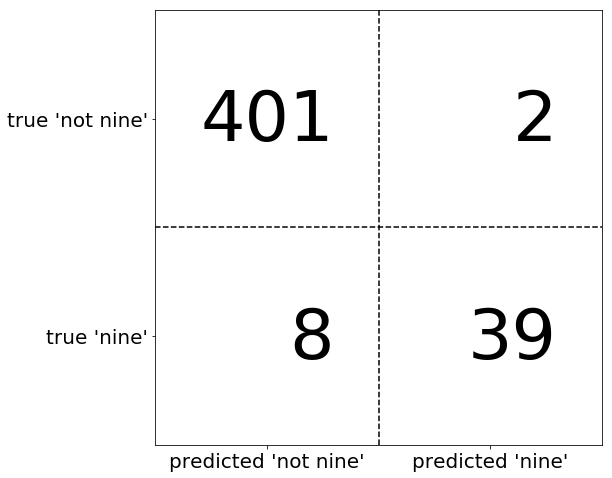

In [40]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, pred_logreg)
print("오차 행렬:\n{}".format(confusion))

mglearn.plots.plot_confusion_matrix_illustration()


대각 행렬은 정확히 분류되고, 나머지 항목은 제대로 분류된 것이 아님. FP, FP, TP, TN 

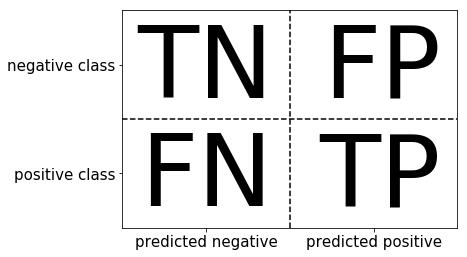

In [41]:
mglearn.plots.plot_binary_confusion_matrix()

In [42]:
print("빈도 기반 더미 모델:")
print(confusion_matrix(y_test, pred_most_frequent))
print("\n무작위 더미 모델:")
print(confusion_matrix(y_test, pred_dummy))
print("\n결정 트리:")
print(confusion_matrix(y_test, pred_tree))
print("\n로지스틱 회귀")
print(confusion_matrix(y_test, pred_logreg))

빈도 기반 더미 모델:
[[403   0]
 [ 47   0]]

무작위 더미 모델:
[[362  41]
 [ 37  10]]

결정 트리:
[[390  13]
 [ 24  23]]

로지스틱 회귀
[[401   2]
 [  8  39]]


빈도 기반 더미 모델이 모든 값을 음성으로 예측했기에 제일 엉망(?)이고, 로지스틱 회귀가 false 판단이 좀더 적음

#### 정확도, 정밀도, 재현율, f1-score

- 정확도 : TP + TN / TP + TN + FP + FN

- 정밀도(precision): 양성으로 예측된 것 중 얼마나 많은 샘플이 진짜 양성?
  - TP / TP + FP
  - 거짓 양성(FP)의 수를 줄이는 신약 치료 효과 등을 떠올려보자. 양성 예측도(PPV)라고도 함
- 재현율(recall): 전체 양성 샘플 중에서 얼마나 많은 샘플이 양성 클래스로 분류?
  - TP / TP + FN
  - 모든 양성 샘플을 식별해야 할 때, 보통 FN를 줄이고자 할 때. 암 진단 사례 등 암에 걸린 사람을 찾는게 중요함.
  - 민감도(sensitivity, hit rate, 진짜 양성 비율(TPR))이라고도 함
  
두 가지 최적화는 상충합니다.

- f1 score: 정밀도와 재현율의 조화평균
   - F = 2 * (precision x recall) / (precision + recall)

In [43]:
from sklearn.metrics import f1_score
print("빈도 기반 더미 모델의 f1 score: {:.2f}".format(
    f1_score(y_test, pred_most_frequent)))
print("무작위 더미 모델의 f1 score: {:.2f}".format(f1_score(y_test, pred_dummy)))
print("트리 모델의 f1 score: {:.2f}".format(f1_score(y_test, pred_tree)))
print("로지스틱 회귀 모델의 f1 score: {:.2f}".format(
    f1_score(y_test, pred_logreg)))

빈도 기반 더미 모델의 f1 score: 0.00
무작위 더미 모델의 f1 score: 0.20
트리 모델의 f1 score: 0.55
로지스틱 회귀 모델의 f1 score: 0.89


/Users/Yeoni/anaconda/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


더미 모델의 경우에는 양성 클래스로 분류된게 없어서 f1 score에 문제가 생깁니다. 뭔가 성능의 지표로는 볼 수 있지만 이해하거나 설명하기가 좀 어렵습니다.

In [44]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_most_frequent,
                            target_names=["9 아님", "9"]))

             precision    recall  f1-score   support

       9 아님       0.90      1.00      0.94       403
          9       0.00      0.00      0.00        47

avg / total       0.80      0.90      0.85       450



/Users/Yeoni/anaconda/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [45]:
print(classification_report(y_test, pred_dummy,
                            target_names=["0-8", "9"]))

             precision    recall  f1-score   support

        0-8       0.91      0.90      0.90       403
          9       0.20      0.21      0.20        47

avg / total       0.83      0.83      0.83       450



In [46]:
print(classification_report(y_test, pred_logreg,
                            target_names=["0-8", "9"]))

             precision    recall  f1-score   support

        0-8       0.98      1.00      0.99       403
          9       0.95      0.83      0.89        47

avg / total       0.98      0.98      0.98       450



#### 불확실성 고려

- 예측값의 경우에는 모델에 담긴 많은 정보가 이미 손실된 상태
- 예측을 만들어 낸다는 것은 decision_function 등의 메서드 출력의 임계값을 검증하는 것임. 0.5로 사용

In [47]:
from mglearn.datasets import make_blobs 
X, y = make_blobs(n_samples=(400, 50), centers=2, cluster_std=[7.0, 2],        
                  random_state=22)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
svc = SVC(gamma=.05).fit(X_train, y_train)

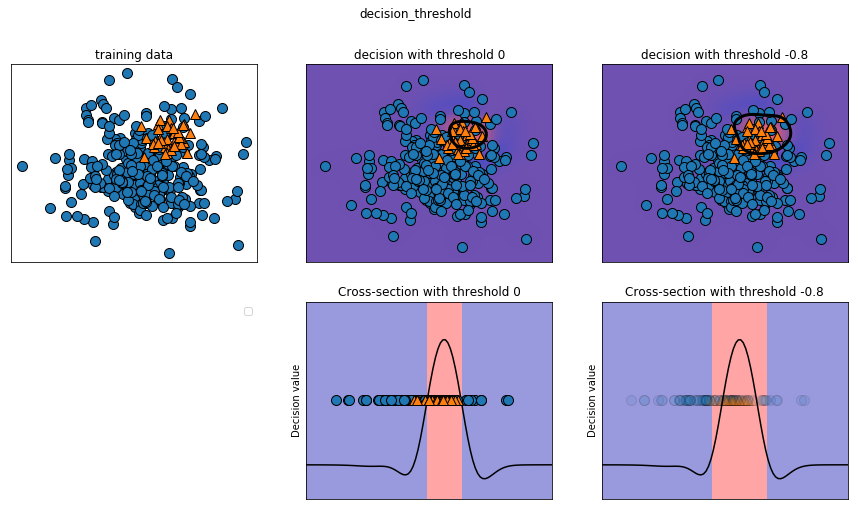

In [48]:
mglearn.plots.plot_decision_threshold()

임계값 잘 몰라서 참고 사이트 [참고][구글 머신러닝 단기집중과정](https://developers.google.com/machine-learning/crash-course/classification/thresholding?hl=ko)

>로지스틱 회귀 값을 이진 카테고리에 매핑하려면 분류 임계값(결정 임계값이라고도 함)을 정의해야 합니다. 임계값보다 높은 값은 '스팸'을 나타내고 임계값보다 낮은 값은 '스팸 아님'을 나타냅니다. 분류 임계값은 항상 0.5여야 한다고 생각하기 쉽지만 임계값은 문제에 따라 달라지므로 값을 조정해야 합니다. 

In [49]:
print(classification_report(y_test, svc.predict(X_test)))

             precision    recall  f1-score   support

          0       0.97      0.89      0.93       104
          1       0.35      0.67      0.46         9

avg / total       0.92      0.88      0.89       113



In [50]:
y_pred_lower_threshold = svc.decision_function(X_test) > -.8

In [51]:
print(classification_report(y_test, y_pred_lower_threshold))

             precision    recall  f1-score   support

          0       1.00      0.82      0.90       104
          1       0.32      1.00      0.49         9

avg / total       0.95      0.83      0.87       113



암 진단과 같이 재현율을 높인다고 하면 임계값을 올려서 클래스 1의 재현율을 높이도록 할 수 있다. 그래서 임계값을 낮춤.

여기서는 일부러 테스트 세트의 결과를 바탕으로 임계값을 선택했지만 실전에서는 꼭 검증 세트나 교차 검증을 사용해서 임계값을 선택하자.

- Calibration 개념과 연관되있음. 보정된 모델은 불확실성을 정확하게 측정하는 모델

#### 정밀도-재현율 곡선과 ROC곡선

분류기의 필요조건을 지정하는 것을 **운영 포인트** *operating point*라고 말함. 비즈니스 목표를 설정할 때 성능을 보장하는데 도움이 됨

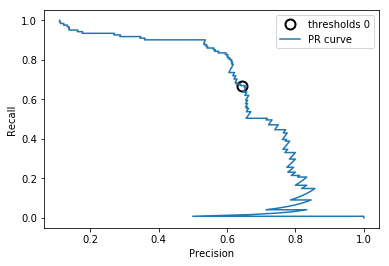

In [55]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(
    y_test, svc.decision_function(X_test))


# 부드러운 곡선을 위해 데이터 포인트 수를 늘립니다
X, y = make_blobs(n_samples=(4000, 500), centers=2, cluster_std=[7.0, 2],
                  random_state=22)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

svc = SVC(gamma=.05).fit(X_train, y_train)

# 0에 가까운 임계값을 찾습니다
close_zero = np.argmin(np.abs(thresholds))
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
         label="thresholds 0", fillstyle="none", c='k', mew=2)

plt.plot(precision, recall, label="PR curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

곡선이 오른쪽 위로 갈 수록 더 좋은 분류기. 임계값이 커지면서 정밀도를 높이지만 재현율은 낮아집니다.

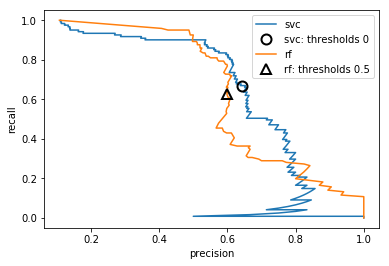

In [57]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=0, max_features=2)
rf.fit(X_train, y_train)

# RandomForestClassifier는 decision_function 대신 predict_proba를 제공합니다.
## 또한 양성 클래스 확신에 대한 측정값을 두 번째 매개변수로 받기 때문에 샘플이 클래스 1일 확률(rf.predict_proba(X_test)[:,1]을 넘겨야 함)
precision_rf, recall_rf, thresholds_rf = precision_recall_curve(
    y_test, rf.predict_proba(X_test)[:, 1])

plt.plot(precision, recall, label="svc")

plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
         label="svc: thresholds 0", fillstyle="none", c='k', mew=2)

plt.plot(precision_rf, recall_rf, label="rf")

close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(precision_rf[close_default_rf], recall_rf[close_default_rf], '^', c='k',
         markersize=10, label="rf: thresholds 0.5", fillstyle="none", mew=2)
plt.xlabel("precision")
plt.ylabel("recall")
plt.legend(loc="best")

In [58]:
print("랜덤 포레스트의 f1_score: {:.3f}".format(
    f1_score(y_test, rf.predict(X_test))))
print("svc의 f1_score: {:.3f}".format(f1_score(y_test, svc.predict(X_test))))

랜덤 포레스트의 f1_score: 0.610
svc의 f1_score: 0.656


정밀도가 매우 높거나 재현율이 높을때에는 랜덤 포레스트가 훨씬 더 낫다고 볼 수도 있다.

정밀도-재현율 곡선의 아랫부분 면적을 계산할 수 있는데, 이를 평균 정밀도라고도 한다.(average_precision_score)

In [59]:
from sklearn.metrics import average_precision_score
ap_rf = average_precision_score(y_test, rf.predict_proba(X_test)[:, 1])
ap_svc = average_precision_score(y_test, svc.decision_function(X_test))
print("랜덤 포레스트의 평균 정밀도: {:.3f}".format(ap_rf))
print("svc의 평균 정밀도: {:.3f}".format(ap_svc))

랜덤 포레스트의 평균 정밀도: 0.666
svc의 평균 정밀도: 0.663


#### ROC와 AUC
---
- ROC : Receiver Operating Characteristics
- AUC : Area under the curve

진짜 양성 비율(TPR)=recall(양성들중에서 양성판별) 에 대한 거짓 양성 비율(FPR)을 나타냅니다. (실제 양성중에서 거짓판별)

FPR = FP / FP + TN 

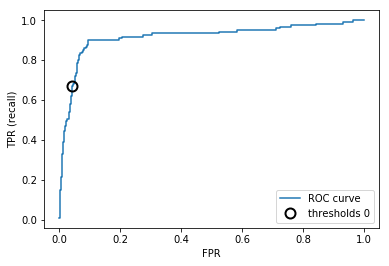

In [61]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, svc.decision_function(X_test))

plt.plot(fpr, tpr, label="ROC curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
# 0 근처의 임계값을 찾습니다
close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
         label="thresholds 0", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)

왼쪽 위에 가까울수록 이상적.

거짓 양성비율이 낮으면서 동시에 재현율이 높은 분류기로 확인할 수 있음. FPR를 조금 늘리면 재현율이 갑자기 올라가기 시작.

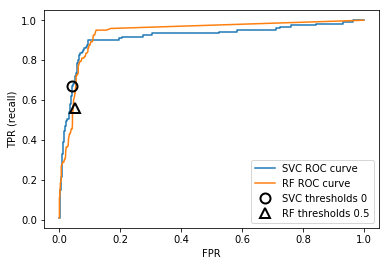

In [64]:
from sklearn.metrics import roc_curve
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])

plt.plot(fpr, tpr, label="SVC ROC curve")
plt.plot(fpr_rf, tpr_rf, label="RF ROC curve")

plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
         label="SVC thresholds 0", fillstyle="none", c='k', mew=2)
close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(fpr_rf[close_default_rf], tpr[close_default_rf], '^', markersize=10,
         label="RF thresholds 0.5", fillstyle="none", c='k', mew=2)

plt.legend(loc=4)

In [65]:
from sklearn.metrics import roc_auc_score
rf_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])
svc_auc = roc_auc_score(y_test, svc.decision_function(X_test))
print("랜덤 포레스트의 AUC: {:.3f}".format(rf_auc))
print("SVC의 AUC: {:.3f}".format(svc_auc))

랜덤 포레스트의 AUC: 0.937
SVC의 AUC: 0.916


AUC는 0가 최악, 1이 최고인데 무작위면 0.5로 간주. 불균형한 데이터셋에서는 AUC로 평가하는게 낫다.

gamma = 1.00  정확도 = 0.90  AUC = 0.50
gamma = 0.10  정확도 = 0.90  AUC = 0.96
gamma = 0.01  정확도 = 0.90  AUC = 1.00


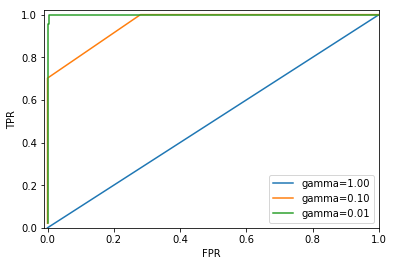

In [66]:
y = digits.target == 9

X_train, X_test, y_train, y_test = train_test_split(
    digits.data, y, random_state=0)

plt.figure()

for gamma in [1, 0.1, 0.01]:
    svc = SVC(gamma=gamma).fit(X_train, y_train)
    accuracy = svc.score(X_test, y_test)
    auc = roc_auc_score(y_test, svc.decision_function(X_test))
    fpr, tpr, _ = roc_curve(y_test , svc.decision_function(X_test))
    print("gamma = {:.2f}  정확도 = {:.2f}  AUC = {:.2f}".format(
        gamma, accuracy, auc))
    plt.plot(fpr, tpr, label="gamma={:.2f}".format(gamma))
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.xlim(-0.01, 1)
plt.ylim(0, 1.02)
plt.legend(loc="best")

auc를 사용할 경우 정확도와는 다른 면에서 확인이 쉬움 그러나 좋은 분류 결과를 얻으려면 임계값 조정 필요.

### 5.3.3 다중 분류의 평가 지표

In [67]:
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(
    digits.data, digits.target, random_state=0)
lr = LogisticRegression().fit(X_train, y_train)
pred = lr.predict(X_test)
print("정확도: {:.3f}".format(accuracy_score(y_test, pred)))
print("오차 행렬:\n{}".format(confusion_matrix(y_test, pred)))

정확도: 0.953
오차 행렬:
[[37  0  0  0  0  0  0  0  0  0]
 [ 0 39  0  0  0  0  2  0  2  0]
 [ 0  0 41  3  0  0  0  0  0  0]
 [ 0  0  1 43  0  0  0  0  0  1]
 [ 0  0  0  0 38  0  0  0  0  0]
 [ 0  1  0  0  0 47  0  0  0  0]
 [ 0  0  0  0  0  0 52  0  0  0]
 [ 0  1  0  1  1  0  0 45  0  0]
 [ 0  3  1  0  0  0  0  0 43  1]
 [ 0  0  0  1  0  1  0  0  1 44]]


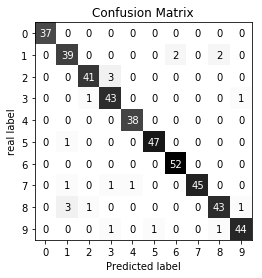

In [68]:
scores_image = mglearn.tools.heatmap(
    confusion_matrix(y_test, pred), xlabel='Predicted label',
    ylabel='real label', xticklabels=digits.target_names,
    yticklabels=digits.target_names, cmap=plt.cm.gray_r, fmt="%d")    
plt.title("Confusion Matrix")
plt.gca().invert_yaxis()

In [69]:
print(classification_report(y_test, pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        37
          1       0.89      0.91      0.90        43
          2       0.95      0.93      0.94        44
          3       0.90      0.96      0.92        45
          4       0.97      1.00      0.99        38
          5       0.98      0.98      0.98        48
          6       0.96      1.00      0.98        52
          7       1.00      0.94      0.97        48
          8       0.93      0.90      0.91        48
          9       0.96      0.94      0.95        47

avg / total       0.95      0.95      0.95       450



클래스를 평균으로 내어 f1 score를 산정하는 계산법이 있음.


- macro : 가중치 없음
- weighted : 샘플 수에 따라서 가중치를 두어 계산
- micro : FP, FN, TP의 총 수를 헤아린 다음에 정밀도, 재현율, f1-점수를 이 수치로 계산

In [70]:
print("micro 평균 f1 점수: {:.3f}".format(f1_score(y_test, pred, average="micro")))
print("macro 평균 f1 점수: {:.3f}".format(f1_score(y_test, pred, average="macro")))

micro 평균 f1 점수: 0.953
macro 평균 f1 점수: 0.954


### 5.3.4 회귀의 평가 지표

### 5.3.5 모델 선택에서 평가 지표 사용하기

In [71]:
# 분류의 기본 평가 지표는 정확도 입니다
print("기본 평가 지표: {}".format(
      cross_val_score(SVC(), digits.data, digits.target == 9)))
# scoring="accuracy"의 결과는 같습니다.
explicit_accuracy =  cross_val_score(SVC(), digits.data, digits.target == 9,
                                     scoring="accuracy")
print("정확도 지표: {}".format(explicit_accuracy))
roc_auc =  cross_val_score(SVC(), digits.data, digits.target == 9,
                           scoring="roc_auc")
print("AUC 지표: {}".format(roc_auc))

기본 평가 지표: [ 0.89983306  0.89983306  0.89983306]
정확도 지표: [ 0.89983306  0.89983306  0.89983306]
AUC 지표: [ 0.99372294  0.98957947  0.99594929]


In [72]:
X_train, X_test, y_train, y_test = train_test_split(
    digits.data, digits.target == 9, random_state=0)

# 일부러 적절하지 않은 그리드를 만듭니다
param_grid = {'gamma': [0.0001, 0.01, 0.1, 1, 10]}
# 기본 정확도 측정 지표를 사용합니다
grid = GridSearchCV(SVC(), param_grid=param_grid)
grid.fit(X_train, y_train)
print("정확도 지표를 사용한 그리드 서치")
print("최적의 파라미터:", grid.best_params_)
print("최상의 교차 검증 점수 (정확도)): {:.3f}".format(grid.best_score_))
print("테스트 세트 AUC: {:.3f}".format(
        roc_auc_score(y_test, grid.decision_function(X_test))))
print("테스트 세트 accuracy: {:.3f}".format(grid.score(X_test, y_test)))

정확도 지표를 사용한 그리드 서치
최적의 파라미터: {'gamma': 0.0001}
최상의 교차 검증 점수 (정확도)): 0.970
테스트 세트 AUC: 0.992
테스트 세트 accuracy: 0.973


In [73]:
# AUC 지표 사용
grid = GridSearchCV(SVC(), param_grid=param_grid, scoring="roc_auc")
grid.fit(X_train, y_train)
print("AUC 지표를 사용한 그리드 서치")
print("최적의 파라미터:", grid.best_params_)
print("최상의 교차 검증 점수 (AUC): {:.3f}".format(grid.best_score_))
print("테스트 세트 AUC: {:.3f}".format(grid.score(X_test, y_test)))

AUC 지표를 사용한 그리드 서치
최적의 파라미터: {'gamma': 0.01}
최상의 교차 검증 점수 (AUC): 0.997
테스트 세트 AUC: 1.000


In [74]:
from sklearn.metrics.scorer import SCORERS
print("가능한 평가 방식:\n{}".format(sorted(SCORERS.keys())))

가능한 평가 방식:
['accuracy', 'adjusted_rand_score', 'average_precision', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'log_loss', 'mean_absolute_error', 'mean_squared_error', 'median_absolute_error', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_median_absolute_error', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc']
